# Interactive Lab Inventory Visualization

This interactive visualization allows you to select a category from the lab inventory and adjust its item count using a slider. The bar chart below will update automatically to reflect the current total count of items per category.


In [1]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
!pip install matplotlib


In [2]:
import pandas as pd

# Load the lab inventory data from the CSV file
lab_inventory = pd.read_csv('C:/Users/omar7/Downloads/modified_lab_inventory_tracker.csv')

# Display the first few rows to confirm it's loaded correctly
lab_inventory.head()


,Category,Item,Boxes,Per case,Count,Company,organoids/imaging,Volume,Volume Unit,Dead Volume,Dead Volume Unit
0,Cell Plates,Greiner bio 384 well,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Cell Plates,"Thermofisher 384 well plates, 120uL",8,30,260,Thermofisher,yes,120.0,µL,NaN,NaN
2,Drug source plates,"Costar 384 well plates, round bottom",0,0,250,Costar,NaN,90.0,µL,20.0,µL
3,Drug source plates,Axygen 384 well 120uL drug storage plates,0,0,31,Axygen,NaN,120.0,µL,20.0,µL
4,Drug source plates,Axygen 384 well 240uL drug storage plates,0,0,13,Axygen,NaN,240.0,µL,20.0,µL


## Update Function

The `update_plot` function updates the item count for the selected category and redraws the bar chart to reflect the current state of the lab inventory.


In [3]:
# Function to update the plot
def update_plot():
    clear_output(wait=True)
    display(container)  # Redisplay widgets
    
    # Summarize data for plotting
    item_counts = lab_inventory.groupby('Item')['Count'].sum().reset_index()
    item_counts_sorted = item_counts.sort_values(by='Count', ascending=False)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.barh(item_counts_sorted['Item'], item_counts_sorted['Count'], color='skyblue')
    plt.xlabel('Total Count')
    plt.ylabel('Item')
    plt.title('Total Count of Items')
    plt.show()


# Interactive Lab Inventory Adjustment

This section allows you to interactively adjust the inventory counts for each item. Use the dropdown to select a category, adjust the amount to add or subtract, and then click the corresponding button to update the count.


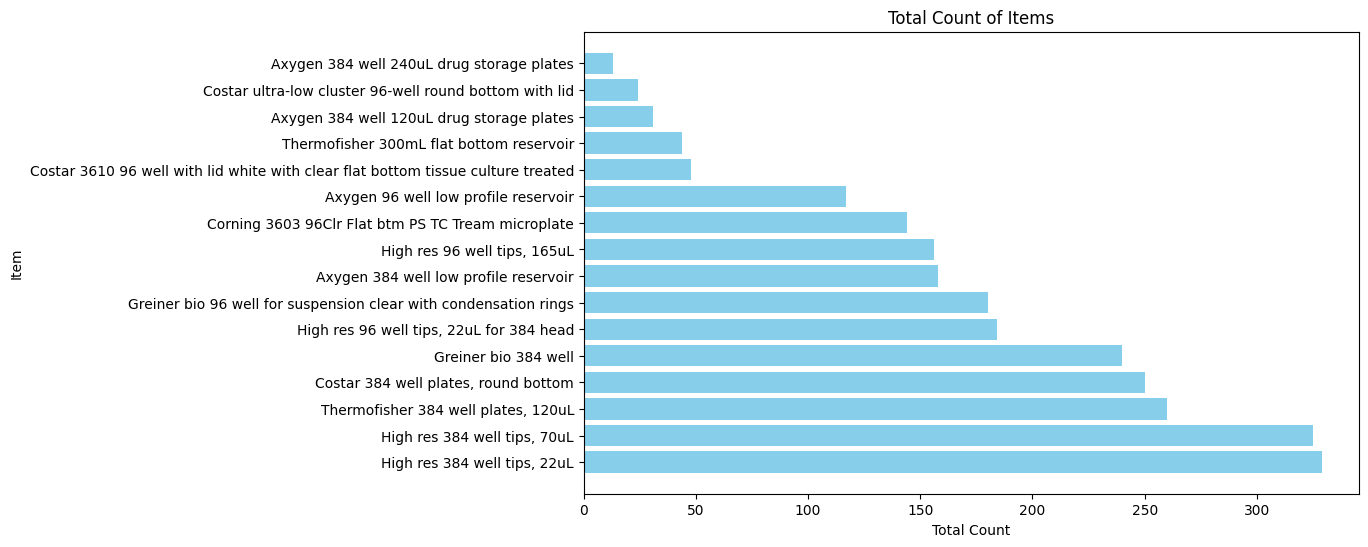

In [4]:

import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt



# Function to add to the item count
def add_to_count(b):
    amount = count_slider.value
    selected_item = item_selector.value
    lab_inventory.loc[lab_inventory['Item'] == selected_item, 'Count'] += amount
    update_plot()

# Function to subtract from the item count
def subtract_from_count(b):
    amount = count_slider.value
    selected_item = item_selector.value
    lab_inventory.loc[lab_inventory['Item'] == selected_item, 'Count'] -= amount
    update_plot()

# Widgets
item_selector = widgets.Dropdown(
    options=lab_inventory['Item'].unique(),
    value=lab_inventory['Item'].unique()[0],
    description='Item:',
)

count_slider = widgets.IntSlider(
    value=1,
    min=1,
    max=100,  # Adjust max as needed
    step=1,
    description='Amount:',
)

add_button = widgets.Button(description="Add")
add_button.on_click(add_to_count)

subtract_button = widgets.Button(description="Subtract")
subtract_button.on_click(subtract_from_count)

# Container to hold widgets
container = widgets.VBox([item_selector, count_slider, add_button, subtract_button])

# Initial plot display
update_plot()

# Display widgets
display(container)
